In [1]:
import numpy as np
import pandas as pd

from octopyenergy import plot as octoplot
from octopyenergy.api import DownloadManager

import matplotlib.pyplot as plt
from IPython.display import JSON

In [2]:
import os
import dotenv
dotenv.load_dotenv('../.env')
octopus_api_key = os.environ['OCTOPUS_API_KEY']
import_meter_mpan = os.environ['IMPORT_METER_MPAN']
export_meter_mpan = os.environ['EXPORT_METER_MPAN']
meter_serial = os.environ['METER_SERIAL']

In [3]:
download_manager = DownloadManager(meter_mpan=import_meter_mpan, 
                                   meter_serial=meter_serial, 
                                   api_key=octopus_api_key)

download_manager

Welcome to the octopyenergy DownloadManager! For more information please read the documentation at https://github.com/AyrtonB/Octopy-Energy.

The following API end-points are available: 
retrieve_products, retrieve_product, retrieve_tariff_charges, retrieve_meter_point, retrieve_electricity_consumption, retrieve_gas_consumption, retrieve_gsps


(0.0, 2.74785)

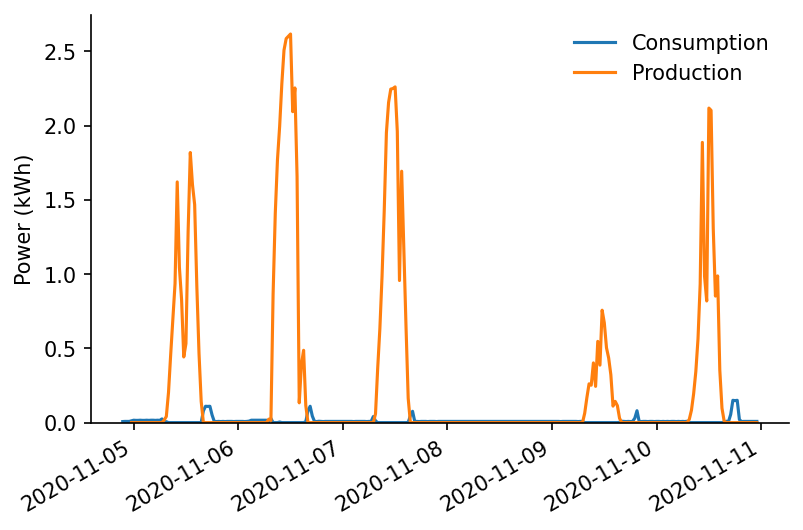

In [67]:
s_elec_consumption = download_manager.create_elec_consumption_s(import_meter_mpan)
s_elec_production = download_manager.create_elec_consumption_s(export_meter_mpan)

fig, ax = octoplot.plot_consumption_production(s_elec_consumption, s_elec_production)
ax.set_ylim(0)

In [ ]:
# Guys handy tariff formulas - https://www.guylipman.com/octopus/formulas.html
# example smart meter analysis module - https://github.com/urld/smartmeter-analyze/blob/development/smartmeter/analyze.py

_ = """
https://octopus.smarthound.uk/report.pdf

# Objective Measurements
You have a total consumption of 260.7kWh
Your average unit rate is 5.01p/kWh
Your average standing charge is 21.00p/day
Your national carbon footprint is 34.12kgCO2, or 137gCO2/kWh
Your regional carbon footprint is 11.35kgCO2, or 45gCO2/kWh

# Subjective Measurements
Your electricity usage is STABLE during this period
Your electricity cost is STABLE during this period
Your estimated base load is 136W, totalling 97.6kWh
Your estimated movable consumption is 129.4kWh – 50% of total usage
"""